# Question 7:
Using the data from Question 4, write code to analyze the data and answer the following questions:

Insights to be drawn:
* Get all the Earth meteorites that fell before the year 2000
* Get all the earth meteorites co-ordinates who fell before the year 1970
* Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000 kg


#### Given mapping
* name - Name of Earth Meteorite - string 
* id - ID of Earth Meteorite - int 
* nametype - string 
* recclass - string
* mass - Mass of Earth Meteorite - float 
* year - Year at which Earth Meteorite was hit - datetime format 
* reclat - float 
* recclong - float
* point coordinates - list of int

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from warnings import filterwarnings
filterwarnings('ignore')

# Reading the data

In [2]:
file_name = 'nasa.csv'
df = pd.read_csv(file_name)
df.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,point_coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [3]:
df.shape

(1000, 9)

In [4]:
df.dtypes

name                  object
id                     int64
nametype              object
recclass              object
mass                 float64
year                  object
reclat               float64
reclong              float64
point_coordinates     object
dtype: object

In [5]:
df.isna().sum()

name                  0
id                    0
nametype              0
recclass              0
mass                 28
year                  1
reclat               12
reclong              12
point_coordinates    12
dtype: int64

# Data Preparation

**Dropping records where year is null**

In [6]:
df = df [df.year.apply(lambda x: x is not np.nan)]

**Extracting year from timestamp in 'year' column**:
* We will not use pd.to_datetime() as there are dates older than 1678 which will raise 'OutOfBoundsDatetime' exception


In [7]:
df['year'] = df['year'].apply(lambda x : x[:4]).astype(int)
df

,name,id,nametype,recclass,mass,year,reclat,reclong,point_coordinates
0,Aachen,1,Valid,L5,21.0,1880,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,1934,13.63333,79.41667,"[79.41667, 13.63333]"
996,Tissint,54823,Valid,Martian (shergottite),7000.0,2011,29.48195,-7.61123,"[-7.61123, 29.48195]"
997,Tjabe,24011,Valid,H6,20000.0,1869,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,1922,-6.66667,106.58333,"[106.58333, -6.66667]"


# Data Analysis

### Insight 1:
Get all the Earth meteorites that fell before the year 2000

In [8]:
df_before_2000 = df [df.year < 2000]
df_before_2000

,name,id,nametype,recclass,mass,year,reclat,reclong,point_coordinates
0,Aachen,1,Valid,L5,21.0,1880,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,1807,54.50000,35.20000,"[35.2, 54.5]"
995,Tirupati,24009,Valid,H6,230.0,1934,13.63333,79.41667,"[79.41667, 13.63333]"
997,Tjabe,24011,Valid,H6,20000.0,1869,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,1922,-6.66667,106.58333,"[106.58333, -6.66667]"


### Insight 2:
Get all the earth meteorites co-ordinates who fell before the year 1970

In [9]:
df_coordinates_before_1970 = df [df.year < 1970] [['name', 'id', 'point_coordinates']]
df_coordinates_before_1970

,name,id,point_coordinates
0,Aachen,1,"[6.08333, 50.775]"
1,Aarhus,2,"[10.23333, 56.18333]"
2,Abee,6,"[-113, 54.21667]"
4,Achiras,370,"[-64.95, -33.16667]"
5,Adhi Kot,379,"[71.8, 32.1]"
...,...,...,...
994,Timochin,24004,"[35.2, 54.5]"
995,Tirupati,24009,"[79.41667, 13.63333]"
997,Tjabe,24011,"[111.53333, -7.08333]"
998,Tjerebon,24012,"[106.58333, -6.66667]"


### Vizualization

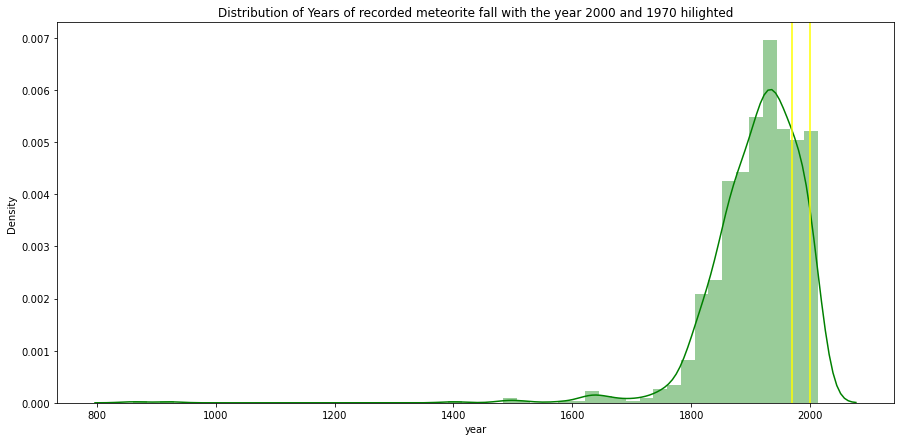

In [13]:
plt.figure(figsize = (15,7))
plt.title('Distribution of Years of recorded meteorite fall with the year 2000 and 1970 hilighted')
sns.distplot(df.year, color = 'green')
plt.axvline(x = 2000, color = 'yellow')
plt.axvline(x = 1970, color = 'yellow')
plt.show()

### Insight 3:
Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000 kg

In [11]:
df_mass_more_than_10000 = df [df.mass > 10000]
df_mass_more_than_10000

,name,id,nametype,recclass,mass,year,reclat,reclong,point_coordinates
2,Abee,6,Valid,EH4,107000.0,1952,54.21667,-113.00000,"[-113, 54.21667]"
7,Agen,392,Valid,H5,30000.0,1814,44.21667,0.61667,"[0.61667, 44.21667]"
11,Aïr,424,Valid,L6,24000.0,1925,19.08333,8.38333,"[8.38333, 19.08333]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981,39.91667,42.81667,"[42.81667, 39.91667]"
27,Alfianello,466,Valid,L6,228000.0,1883,45.26667,10.15000,"[10.15, 45.26667]"
...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,1878,49.60000,17.11667,"[17.11667, 49.6]"
992,Tilden,23998,Valid,L6,74800.0,1927,38.20000,-89.68333,"[-89.68333, 38.2]"
994,Timochin,24004,Valid,H5,65500.0,1807,54.50000,35.20000,"[35.2, 54.5]"
997,Tjabe,24011,Valid,H6,20000.0,1869,-7.08333,111.53333,"[111.53333, -7.08333]"


#### Counts:
Total **243 meteorites** had a mass greater than 10,000 kgs

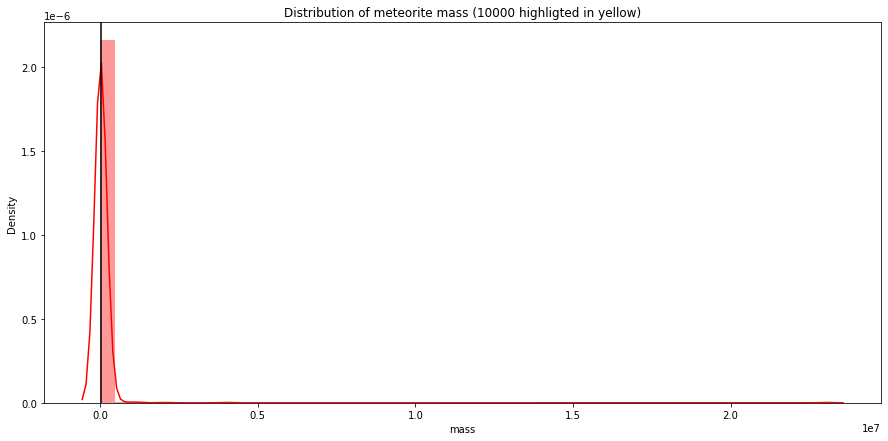

In [14]:
plt.figure(figsize = (15,7))
plt.title('Distribution of meteorite mass (10000 highligted in yellow)')
sns.distplot(df.mass, color = 'red')
plt.axvline(x = 10000, color = 'black')
plt.show()